<a href="https://colab.research.google.com/github/divyanshsaxena21/Acadia_DataScience/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from docx import Document
import os

In [76]:
def find_missing_columns(df):
    missing_columns = df.columns[df.isnull().any()]
    print("Columns with missing values:")
    print(missing_columns)
    return missing_columns


In [77]:
def categorize_columns(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    print("Numeric columns:")
    print(numeric_columns)
    boolean_columns = df.select_dtypes(include=['bool']).columns
    print("\nBoolean columns:")
    print(boolean_columns)
    datetime_columns = df.select_dtypes(include=['datetime']).columns
    print("\nDatetime columns:")
    print(datetime_columns)
    string_columns = df.select_dtypes(include=['object']).columns
    print("\nString columns:")
    print(string_columns)


In [78]:
def find_columns_with_duplicates(df):
    columns_with_duplicates = [col for col in df.columns if df[col].duplicated().any()]
    print("Columns with duplicates:")
    print(columns_with_duplicates)
    return columns_with_duplicates

def drop_columns_with_duplicates(df, columns_with_duplicates):
    df_cleaned = df.drop(columns=columns_with_duplicates)
    print("\nDataFrame after removing duplicate columns:")
    print(df_cleaned)
    return df_cleaned


In [79]:
def find_constant_columns(df):
    # List comprehension to find columns with only one unique value
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]
    print("Constant columns:")
    print(constant_columns)
    return constant_columns

def drop_constant_columns(df, constant_columns):
    # Ensure that the columns to drop actually exist in the DataFrame
    existing_columns = [col for col in constant_columns if col in df.columns]

    if len(existing_columns) > 0:
        # Drop only the columns that exist
        df_cleaned = df.drop(columns=existing_columns)
        print("\nDataFrame after removing constant columns:")
        print(df_cleaned.head())  # Display the first few rows of the cleaned DataFrame
    else:
        print(f"\nNo columns to drop. The following columns were not found in the DataFrame: {set(constant_columns) - set(df.columns)}")
        df_cleaned = df  # If no columns were found, return the original dataframe

    return df_cleaned

In [80]:
def create_box_plot(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Create the box plot
    plt.figure(figsize=(12, 8))  # Set the figure size for better readability
    sns.boxplot(data=df[numeric_columns])  # Create the box plot for all numeric columns

    # Add title and labels
    plt.title('Box Plot of Numeric Columns to Visualize Outliers', fontsize=16)
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to avoid clipping

    # Display the plot
    plt.show()


In [81]:
def plot_distributions(df, columns):
    # Set up the plotting area (2x3 grid for 6 charts)
    plt.figure(figsize=(18, 10))

    # Loop through the selected columns and create a plot for each
    for i, col in enumerate(columns):
        plt.subplot(2, 3, i+1)  # Create a 2x3 grid of subplots
        if df[col].dtype == 'object':  # If the column is categorical (object type)
            sns.countplot(x=df[col])  # Count plot for categorical data
            plt.title(f'Distribution of {col}')
        else:  # For numeric data
            sns.histplot(df[col], kde=True, bins=20)  # Histogram with KDE for numeric data
            plt.title(f'Distribution of {col}')

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()


In [84]:
def purify(df):
    # Identify missing columns
    missing_columns = find_missing_columns(df)

    # Identify column types
    categories = categorize_columns(df)

    # Identify and remove columns with duplicates
    columns_with_duplicates = find_columns_with_duplicates(df)
    df_cleaned = drop_columns_with_duplicates(df, columns_with_duplicates)

    # Identify and remove constant columns
    constant_columns = find_constant_columns(df)
    df_cleaned = drop_constant_columns(df_cleaned, constant_columns)

    # Create a box plot to visualize outliers
    create_box_plot(df)
    create_box_plot(df_cleaned)

    return df_cleaned

In [85]:
def plot_distributions(df, columns):
    # Set up the plotting area (2x3 grid for 6 charts)
    plt.figure(figsize=(18, 10))

    # Loop through the selected columns and create a plot for each
    for i, col in enumerate(columns):
        plt.subplot(2, 3, i+1)  # Create a 2x3 grid of subplots
        if df[col].dtype == 'object':  # If the column is categorical (object type)
            sns.countplot(x=df[col])  # Count plot for categorical data
            plt.title(f'Distribution of {col}')
        else:  # For numeric data
            sns.histplot(df[col], kde=True, bins=20)  # Histogram with KDE for numeric data
            plt.title(f'Distribution of {col}')

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Save the plot as an image before showing it
    plt.savefig('distribution_plots.png')

    # Display the plot
    plt.show()

In [110]:
def generate_html_report(df, selected_columns):
    # Create a basic HTML file
    html_report = "<html><head><title>Data Analysis Report</title></head><body>"
    html_report += "<h1>Data Analysis Results</h1>"

    # Section 1: Data Summary
    html_report += "<h2>Data Summary:</h2>"
    html_report += df.describe().to_html()  # Summary statistics table

    # Section 2: Distribution Plots for Selected Columns
    html_report += "<h2>Distribution Plots:</h2>"

    # Instead of generating a new plot, we reference the existing image
    plot_image_path = './distribution_plots.png'

    # Add the image to the HTML report
    html_report += f"<img src='{plot_image_path}' alt='Distribution Plots' />"

    # End HTML report
    html_report += "</body></html>"

    # Write to HTML file
    with open("data_analysis_report.html", "w") as f:
        f.write(html_report)

    print("HTML report generated and saved as data_analysis_report.html")


In [96]:
def generate_pdf_report(df, selected_columns, output_pdf_path='data_analysis_report.pdf'):
    # Initialize the PDF
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Title
    pdf.set_font('Arial', 'B', 16)
    pdf.cell(200, 10, txt="Data Analysis Report", ln=True, align="C")

    # Section 1: Data Summary
    pdf.ln(10)  # Add space
    pdf.set_font('Arial', '', 12)
    pdf.cell(200, 10, txt="Data Summary:", ln=True)
    pdf.multi_cell(0, 10, txt=str(df.describe()))  # Add summary stats as text

    # Section 2: Distribution Plots for Selected Columns
    pdf.ln(10)
    pdf.cell(200, 10, txt="Distribution Plots:", ln=True)

    # Instead of generating a new image, we use the existing one.
    plot_image_path = '/content/distribution_plots.png'

    # Check if the image exists before attempting to add it to the PDF
    try:
        # Add the plot image to the PDF (adjust the size and position as needed)
        pdf.image(plot_image_path, x=10, y=pdf.get_y(), w=180)
        pdf.ln(100)  # Ensure there is enough space for the image
    except Exception as e:
        print(f"Error: Could not add image to the PDF. {e}")

    # Output the PDF to the specified file
    pdf.output(output_pdf_path)

    print(f"PDF report generated and saved as {output_pdf_path}")


In [88]:
import docx
from docx.shared import Inches

def generate_word_report(df, selected_columns, image_path):
    # Create a new Document
    doc = docx.Document()
    doc.add_heading('Data Analysis Report', 0)

    # Section 1: Data Summary
    doc.add_heading('Data Summary:', level=1)
    doc.add_paragraph(str(df.describe()))  # Add summary stats as text

    # Section 2: Distribution Plots for Selected Columns
    doc.add_heading('Distribution Plots:', level=1)

    # Add the image to the document (make sure image_path points to the correct location)
    doc.add_picture(image_path, width=Inches(6))  # Adjust width as needed

    # Save the Word document
    doc.save('data_analysis_report.docx')
    print("Report generated and saved as data_analysis_report.docx")

# Example usage (ensure you pass the dataframe and the columns you want to plot)
# generate_word_report(df, ['column1', 'column2'], '/content/distribution_plots.png')


Enter file path/content/data.csv
Columns with missing values:
Index(['STATE', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'AGE', 'INCOME',
       'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT',
       'NUMBER OF ADULTS IN LIVING UNIT', 'MOSAIC',
       'CAPE: AGE: POP: MEDIAN AGE', 'CAPE: AGE: POP: % 0-17',
       'CAPE: AGE: POP: % 18-99+', 'CAPE: AGE: POP: % 65-99+',
       'CAPE: ETHNIC: POP: % WHITE ONLY', 'CAPE: ETHNIC: POP: % BLACK ONLY',
       'CAPE: ETHNIC: POP: % ASIAN ONLY', 'CAPE: ETHNIC: POP: % HISPANIC',
       'CAPE: DENSITY: PERSONS PER HH FOR POP IN HH',
       'CAPE: HHSIZE: HH: AVERAGE HOUSEHOLD SIZE',
       'CAPE: TYP: HH: % MARRIED COUPLE FAMILY',
       'CAPE: CHILD: HH: % WITH PERSONS LT18',
       'CAPE: CHILD: HH: % MARR COUPLE FAMW- PERSONS LT18',
       'CAPE: CHILD: HH: % MARR COUPLE FAMW-O PERSONS LT18',
       'CAPE: LANG: HH: % SPANISH SPEAKING',
       'CAPE: EDUC: POP25+: MEDIAN EDUCATION ATTAINED',
       'CAPE: HOMVAL: OOHU: MEDIAN HOME VA

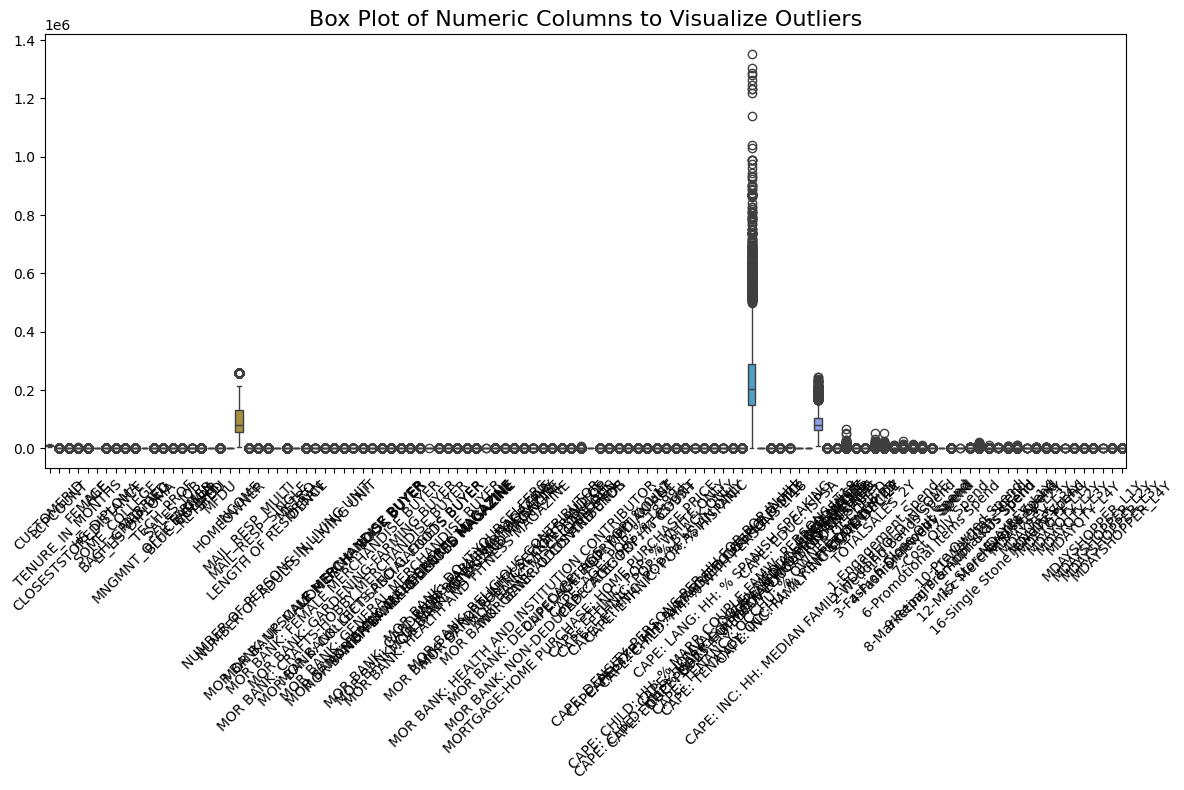

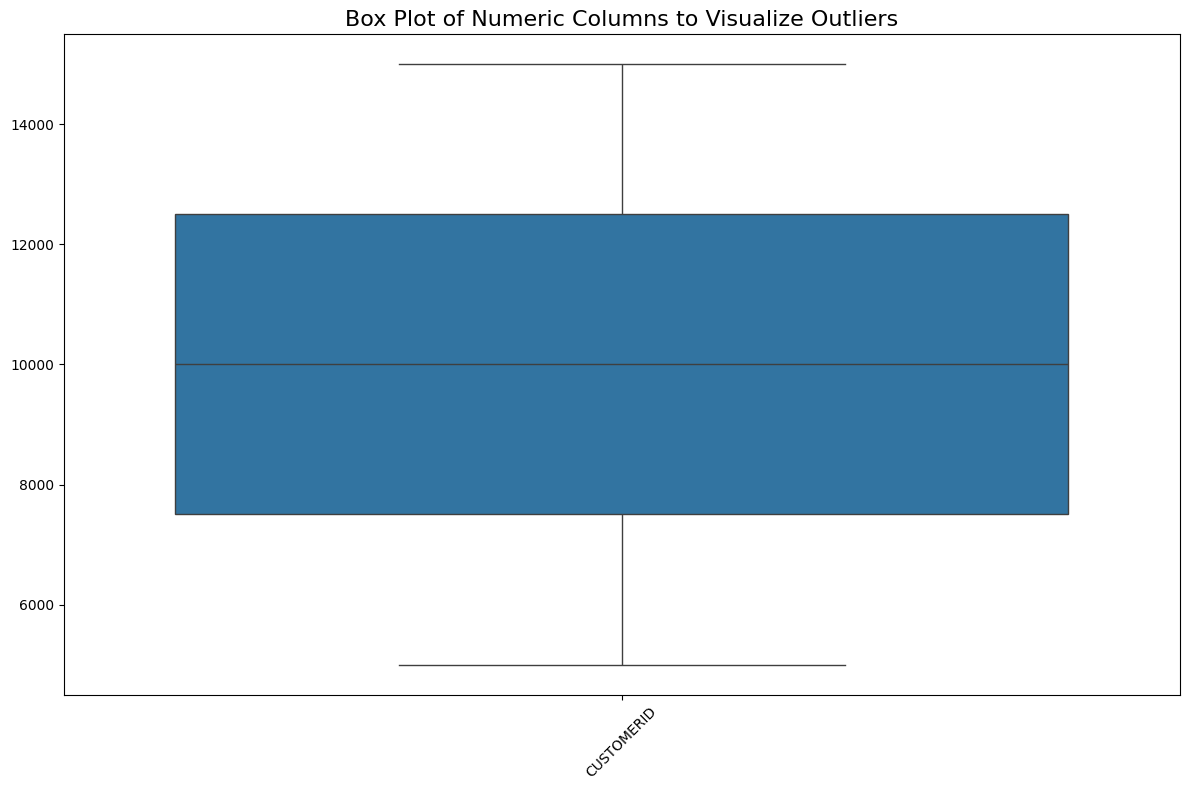

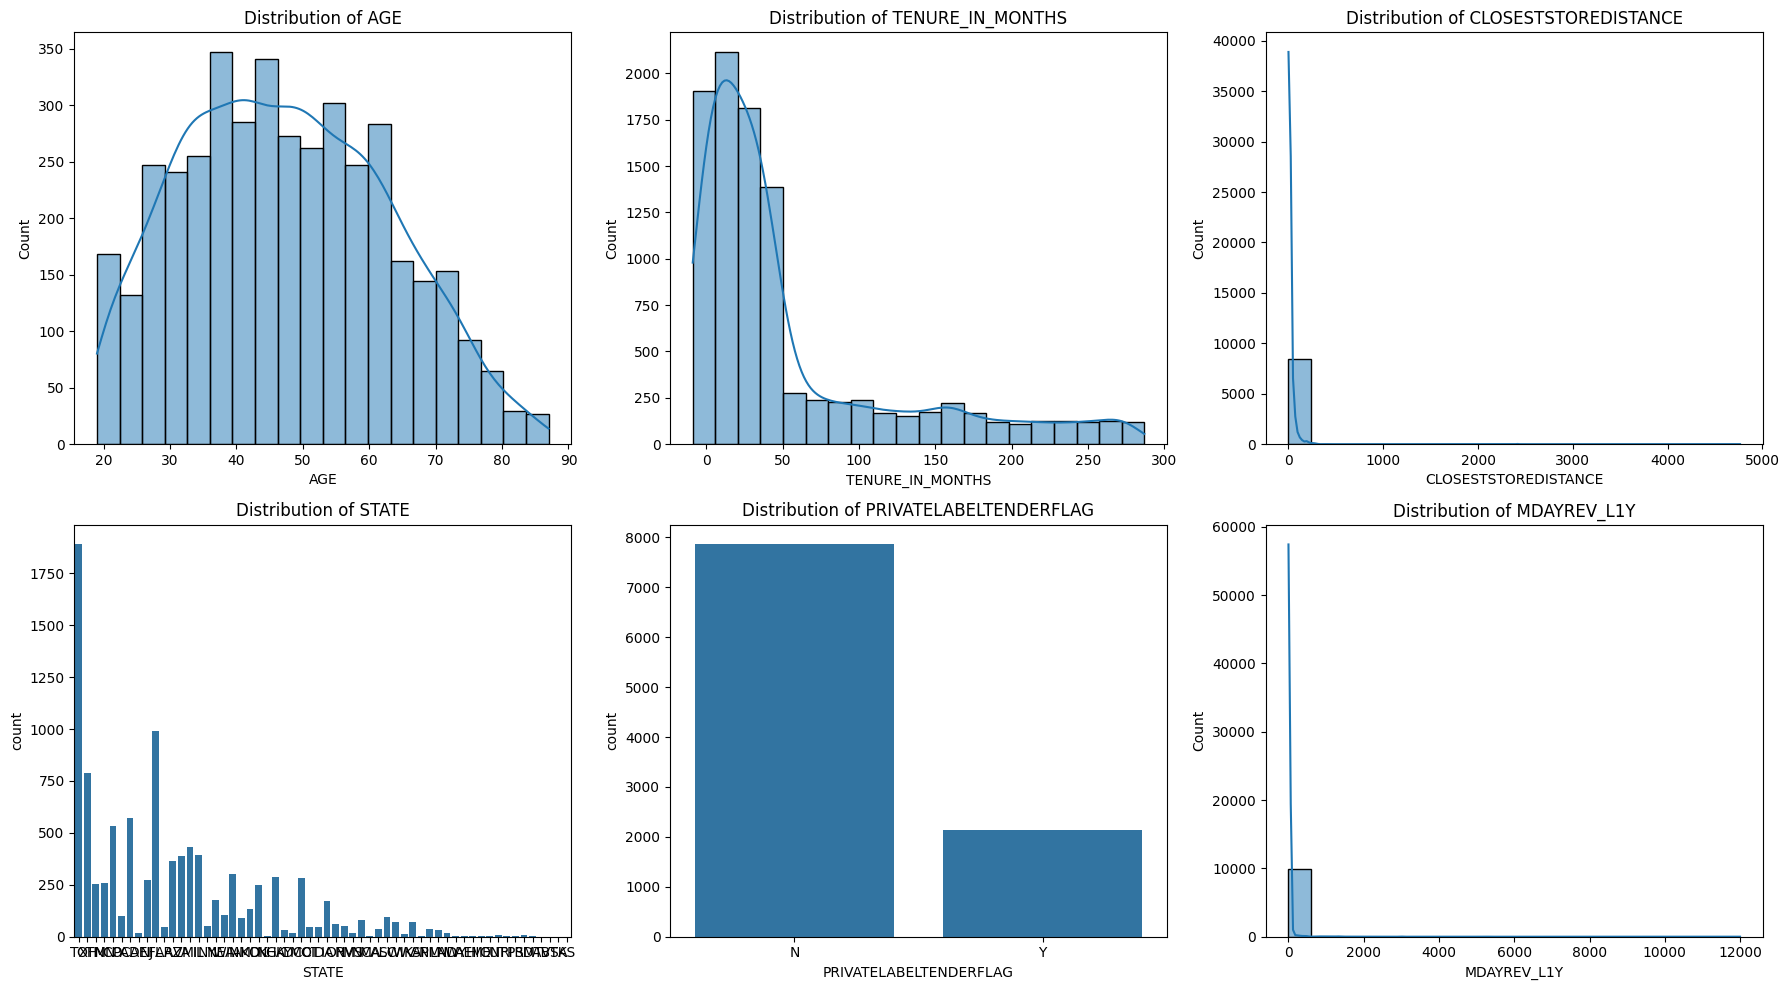

Enter file type:
 html, pdf, word
word
Report generated and saved as data_analysis_report.docx


In [113]:
#MAIN
def main():
    path = input("Enter file path")
    data = pd.read_csv(path)
    df = purify(data)
    selected_columns = ['AGE', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'STATE',
                    'PRIVATELABELTENDERFLAG', 'MDAYREV_L1Y']
    plot_distributions(data, selected_columns)

    file_type = input("Enter file type:\n html, pdf, word\n")
    if file_type == "html":
      generate_html_report(data, selected_columns)
    elif file_type == "pdf":
      generate_pdf_report(data, selected_columns)
    elif file_type == "word":
      generate_word_report(data, ['column1', 'column2'], '/content/distribution_plots.png')
    else:
      print("Invalid file type")

main()